# Manipulating image frequencies for image filtration

Using fast Fourier transform, we convert the image from the spatial domain to the frequency domain. Then, we create a mask with zeros everywhere except a rectangle at the center. Using that mask, we set amplitudes for high frequencies to zero and convert the image back to spatial representation.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]
Populating the interactive namespace from numpy and matplotlib


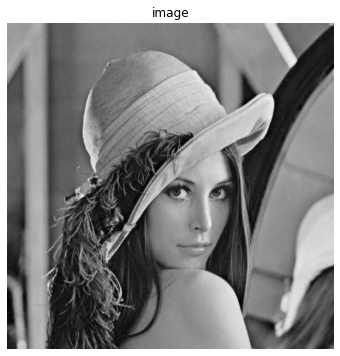

In [2]:
image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255


##################################################
print_image('Original','image',image,0,1,0,7)
plt.figure(figsize=(6,6))
%pylab inline
plt_view_image(plt,[["image",image]    ])

In [3]:
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

#######################################################
print_image('fft','fft',fft,0,1,0,7)

------  fft----------------------    Shape(512, 512, 2) fft: float32
[ [136137.34      0.  ] [-1790.49  8488.41] [ 5968.948 -4661.742] [-1076.8411  2124.9263] [-1270.0779 -4038.9883] [-4278.259  -1804.4592] [-3585.863   2798.4468] ]


------  Original-----------------    Shape(512, 512) image: float32
[ 0.45882353 0.46666667 0.46666667 0.47843137 0.47843137 0.47058824 0.47058824 ]
------  mask---------------------    Shape(512, 512, 2) mask: uint8
[ [0 0] [0 0] [0 0] [0 0] [0 0] [0 0] [0 0] ]
------  fft_shift----------------    Shape(512, 512, 2) fft_shift: float32
[ [1.4627304 0.       ] [-0.5586777 -3.6204984] [0.9583483  0.32523012] [ 1.1794167 -5.1778097] [-0.50476074  0.6330166 ] [4.245591  1.6173921] [-0.66358376 -1.7950206 ] ]
[[[ 0.        ]
  [-3.6204984 ]
  [ 0.32523012]
  ...
  [ 5.1778097 ]
  [-0.32523012]
  [ 3.6204984 ]]

 [[-2.2706738 ]
  [-1.3073342 ]
  [ 0.8316176 ]
  ...
  [ 0.8304701 ]
  [-1.2414503 ]
  [ 3.753643  ]]

 [[ 0.56854343]
  [ 0.26406547]
  [-1.7866676 ]
  ...
  [ 1.7148004 ]
  [-1.3829671 ]
  [ 0.5232706 ]]

 ...

 [[-0.02550411]
  [-4.3648014 ]
  [-5.2823534 ]
  ...
  [ 2.2395232 ]
  [-0.87161887]
  [-2.1393058 ]]

 [[-0.5685439 ]
  [-0.5232706 ]
  [ 1.3829671 ]
  ...
  [ 2.0095205 

TypeError: Invalid shape (512, 512, 1) for image data

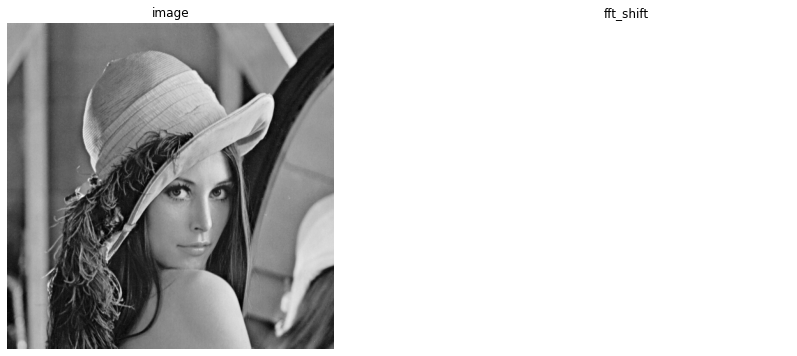

In [17]:
fft_shift = np.fft.fftshift(fft, axes=[0, 1])
sz = 25
mask = np.zeros(fft.shape, np.uint8)
mask[image.shape[0]//2-sz:image.shape[0]//2+sz,
     image.shape[1]//2-sz:image.shape[1]//2+sz, :] = 1
fft_shift *= 1-mask
fft = np.fft.ifftshift(fft_shift, axes=[0, 1])

################################################
print_image('Original','image',image,10,11,100,107)
print_image('mask','mask',mask,10,11,100,107)
print_image('fft_shift','fft_shift',fft_shift,0,1,0,7)#10,11,100,107)
print(fft_shift[:512,:512,[1]])
print_image('fft','fft',fft,10,11,100,107)


------  Original-----------------    Shape(512, 512) image: float32
[ 0.45882353 0.46666667 0.46666667 0.47843137 0.47843137 0.47058824 0.47058824 ]
------  filtered-----------------    Shape(512, 512) filtered: float32
[ -0.016058814 -0.008850567 -0.009809965 0.00056973286 -0.0013345852 -0.0116774505 -0.014823422 ]


<Figure size 432x432 with 0 Axes>

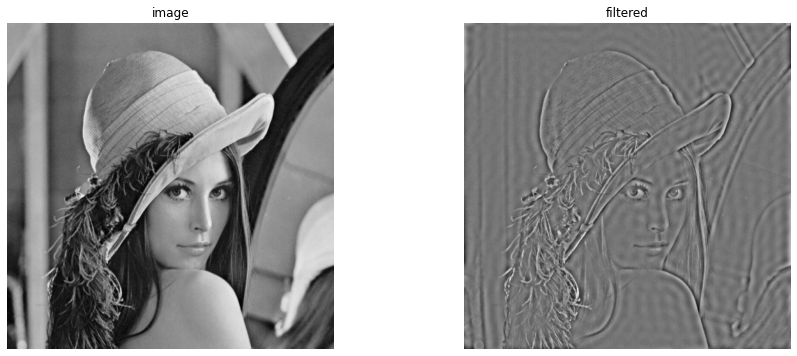

In [5]:
filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)


################################################
print_image('Original','image',image,10,11,100,107)
print_image('filtered','filtered',filtered,10,11,100,107)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image],
                    ["filtered",filtered]
                   ])
cv2.imshow('image, filtered', np.hstack([image, filtered]))
cv2.waitKey()
cv2.destroyAllWindows()